# An Analysis of scores for different divisions of Eventing at the Beginner Novice Level

## Introduction

Introduction goes here...

The first step is to read in the file where the scores are held.  We do this using the "read.csv" command.  This creates a data frame containing all of the scores from the file.  header=TRUE indicates that there is a header in the file that contains the titles of the different columns.

In [168]:
scores <- read.csv(file="scores.csv", header=TRUE)
library(Hmisc)

Next, we will show the first 6 elements of the table.  This gives us a basic idea of the data.  We can see that there are 12 columns for each row.  These are:

* dressage score
* place after dressage
* cross country jumping penalties
* cross country time penalties
* total penalties after cross country
* place after cross country
* show jumping jumping penalties
* show jumping time penalties
* total penalties after show jumping (final penalty score)
* final place
* year
* Division (A = Amateur, H = Horse, R = Rider, M = Master(over age ), J = Junior(under age 18), Y = Young Rider(under age 14)

For the sake of simplicity, the scores of the competitors that did not complete the event are not counted in this spreadsheet.  There are several reasons a competitor could not complete, including a rider fall (RF), technical elimination (TE), or withdrawl (W) from the competition.  As each of these non-finishes are indicated by a letter, it is impossible to perform the same type of analysis on non-finishers, as the values for certain fields are not quantitative, but qualitative.  The scores of competitors who did not finish is included later in the notebook.

In [148]:
head(scores)

Dr.Score,Place.after.Dr,XC.Jump,XC.Time,Total.after.XC,Place.after.XC,SJ.Jump,SJ.Time,Total.after.SJ,Final.Place,Year,Division
24.5,1,0,0.0,24.5,1,0,0,24.5,1,2018,A
28.1,4,0,0.4,28.5,2,0,0,28.5,2,2018,A
30.5,6,0,0.0,30.5,4,0,0,30.5,3,2018,A
31.1,8,0,0.0,31.1,6,0,0,31.1,4,2018,A
32.0,11,0,0.0,32.0,8,0,0,32.0,5,2018,A
32.5,13,0,0.0,32.5,10,0,0,32.5,6,2018,A


## Data Exploration

We can see that the lowest dressage score was a 19.8 and the highest was a 46.3.  We can see that the median (33.5) and the mean (33.72) are fairly close together, implying that there are not many outliers in dressage score.

In [149]:
summary(scores$Dr.Score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.80   30.57   33.50   33.65   37.00   46.30 

Now, look at the summary of final scores.  We can see that the lowest score is still a 19.8, meaning that the competitor did not obtain any cross country or show jumping penalties.  However, the other numbers are quite different.  We can see that the median and mean have a much larger difference than the dressage scores, which makes sense given the number of penalities that can be obtained in cross country and show jumping.

In [150]:
summary(scores$Total.after.SJ)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.80   32.50   37.80   42.61   45.88  176.50 

Now let's examine the scores of the competitors that placed in the top 10 of their division.

In [151]:
topTenScores <- subset(scores, scores$Final.Place < 10)

In [152]:
summary(topTenScores$Total.after.SJ)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.80   29.15   30.80   30.72   32.50   41.50 

In [154]:
totalXCPenalties <- (scores$XC.Jump + scores$XC.Time)
describe(totalXCPenalties)

totalXCPenalties 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     422        0       56    0.615    6.506    11.13      0.0      0.0 
     .25      .50      .75      .90      .95 
     0.0      0.0      1.5     20.0     40.0 

lowest :   0.0   0.4   0.8   1.2   1.6, highest:  69.6  72.0  73.2 105.2 133.0

In [155]:
describe(scores$XC.Jump)

scores$XC.Jump 
       n  missing distinct     Info     Mean      Gmd 
     422        0        5    0.418    4.751    8.325 
                                        
Value          0    20    40    60   125
Frequency    352    51    11     7     1
Proportion 0.834 0.121 0.026 0.017 0.002

The above gives a good description of the cross country scores.  We can see that a large majority of competitors (352) have 0 penalties, meaning they did not have any refusals or falls.  This accounts for 83.4% of competitors.

In [157]:
changeInPlace <- scores$Place.after.Dr - scores$Final.Place

In [158]:
movedUpInPlacing <- subset(changeInPlace, changeInPlace > 0)
describe(movedUpInPlacing)

movedUpInPlacing 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     271        0       19    0.992     6.14    4.497        1        1 
     .25      .50      .75      .90      .95 
       3        6        9       11       13 
                                                                            
Value          1     2     3     4     5     6     7     8     9    10    11
Frequency     33    27    27    28    13    25    27    15    28    10    12
Proportion 0.122 0.100 0.100 0.103 0.048 0.092 0.100 0.055 0.103 0.037 0.044
                                                          
Value         12    13    14    15    17    18    19    20
Frequency      5     9     3     3     1     2     1     2
Proportion 0.018 0.033 0.011 0.011 0.004 0.007 0.004 0.007

In [159]:
movedDownInPlacing <- subset(changeInPlace, changeInPlace < 0)
describe(movedDownInPlacing)

movedDownInPlacing 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     126        0       25    0.995   -8.595    7.777   -24.75   -19.00 
     .25      .50      .75      .90      .95 
  -12.75    -6.00    -3.00    -2.00    -1.00 

lowest : -28 -27 -25 -24 -21, highest:  -5  -4  -3  -2  -1

In [160]:
placingRemainedTheSame <- subset(changeInPlace, changeInPlace ==0)
describe(placingRemainedTheSame)

placingRemainedTheSame 
       n  missing distinct     Info     Mean      Gmd 
      25        0        1        0        0        0 
             
Value       0
Frequency  25
Proportion  1

It is interesting to note that 271 competitors moved up in placing, or 64.218%, while 126 or 29.856% went down in placing.  25, or 5.924% of competitors maintined the same position they started with.

In [161]:
totalSJPenalties <- scores$SJ.Jump + scores$SJ.Time
describe(totalSJPenalties)

totalSJPenalties 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     422        0       20    0.764     2.45    3.598        0        0 
     .25      .50      .75      .90      .95 
       0        0        4        8        9 
                                                                            
Value          0     1     2     3     4     5     6     7     8     9    10
Frequency    256     5     3     2    98     5     1     1    27     3     2
Proportion 0.607 0.012 0.007 0.005 0.232 0.012 0.002 0.002 0.064 0.007 0.005
                                                                
Value         12    13    14    16    19    20    28    31    32
Frequency      5     2     2     5     1     1     1     1     1
Proportion 0.012 0.005 0.005 0.012 0.002 0.002 0.002 0.002 0.002

Here we can see that 256 competitors did not collect any penalties in show jumping.  This means that 60% of competitors do not

In [162]:
diffInFinalScore <- scores$Total.after.SJ - scores$Dr.Score
summary(diffInFinalScore)
sum(diffInFinalScore == 0)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   4.000   8.956   8.400 137.000 

[1] 184

It is interesting to note that 184 competitors finished on their dressage score.  That's 43.602%.

In [163]:
sum(topTenScores$Total.after.SJ - topTenScores$Dr.Score == 0)

[1] 103

In [164]:
describe(topTenScores)

topTenScores 

 12  Variables      135  Observations
--------------------------------------------------------------------------------
Dr.Score 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     135        0       55    0.999    29.82    3.642    24.30    25.50 
     .25      .50      .75      .90      .95 
   27.80    30.30    32.00    33.14    35.16 

lowest : 19.8 20.0 22.3 22.5 23.3, highest: 35.6 36.0 36.3 36.5 38.5
--------------------------------------------------------------------------------
Place.after.Dr 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     135        0       19    0.994    7.319    5.259      1.0      2.0 
     .25      .50      .75      .90      .95 
     3.5      6.0     11.0     13.0     16.0 
                                                                            
Value          1     2     3     4     5     6     7     8     9    10    11
Frequency     12    11    11    11    13    12     4     9 

76.296% of competitors in the top 10 finished on their dressage score.

In [165]:
by(scores, scores$Division, summary)

scores$Division: A
    Dr.Score     Place.after.Dr     XC.Jump          XC.Time    
 Min.   :24.50   Min.   : 1.00   Min.   : 0.000   Min.   : 0.0  
 1st Qu.:30.80   1st Qu.: 7.00   1st Qu.: 0.000   1st Qu.: 0.0  
 Median :32.50   Median :14.00   Median : 0.000   Median : 0.0  
 Mean   :33.63   Mean   :14.81   Mean   : 7.273   Mean   : 2.8  
 3rd Qu.:37.00   3rd Qu.:22.00   3rd Qu.: 0.000   3rd Qu.: 0.0  
 Max.   :46.30   Max.   :35.00   Max.   :60.000   Max.   :28.0  
 Total.after.XC  Place.after.XC     SJ.Jump         SJ.Time      
 Min.   : 24.5   Min.   : 1.00   Min.   : 0.00   Min.   :0.0000  
 1st Qu.: 31.4   1st Qu.: 7.00   1st Qu.: 0.00   1st Qu.:0.0000  
 Median : 36.8   Median :14.00   Median : 0.00   Median :0.0000  
 Mean   : 43.7   Mean   :14.29   Mean   : 2.13   Mean   :0.5195  
 3rd Qu.: 50.0   3rd Qu.:20.00   3rd Qu.: 4.00   3rd Qu.:0.0000  
 Max.   :103.5   Max.   :34.00   Max.   :16.00   Max.   :8.0000  
 Total.after.SJ    Final.Place         Year      Division
 Min. 

In [166]:
by(topTenScores, topTenScores$Division, summary)

topTenScores$Division: A
    Dr.Score    Place.after.Dr      XC.Jump     XC.Time        Total.after.XC 
 Min.   :24.5   Min.   : 1.000   Min.   :0   Min.   :0.00000   Min.   :24.50  
 1st Qu.:29.3   1st Qu.: 4.000   1st Qu.:0   1st Qu.:0.00000   1st Qu.:29.30  
 Median :30.8   Median : 7.000   Median :0   Median :0.00000   Median :30.80  
 Mean   :30.4   Mean   : 8.074   Mean   :0   Mean   :0.08889   Mean   :30.49  
 3rd Qu.:31.9   3rd Qu.:11.500   3rd Qu.:0   3rd Qu.:0.00000   3rd Qu.:31.90  
 Max.   :35.1   Max.   :19.000   Max.   :0   Max.   :2.00000   Max.   :35.10  
 Place.after.XC     SJ.Jump          SJ.Time        Total.after.SJ 
 Min.   : 1.00   Min.   :0.0000   Min.   :0.00000   Min.   :24.50  
 1st Qu.: 2.50   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:30.50  
 Median : 5.00   Median :0.0000   Median :0.00000   Median :31.30  
 Mean   : 5.63   Mean   :0.8889   Mean   :0.03704   Mean   :31.41  
 3rd Qu.: 8.00   3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:32.50  
 Max.   :14.00

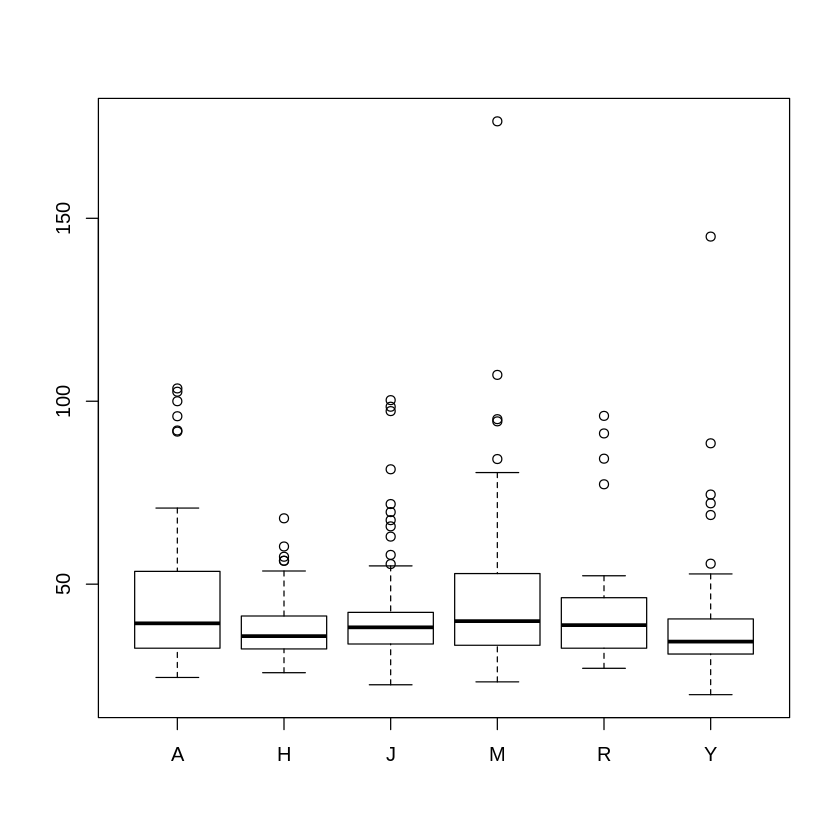

In [167]:
plot(scores$Division, scores$Total.after.SJ)

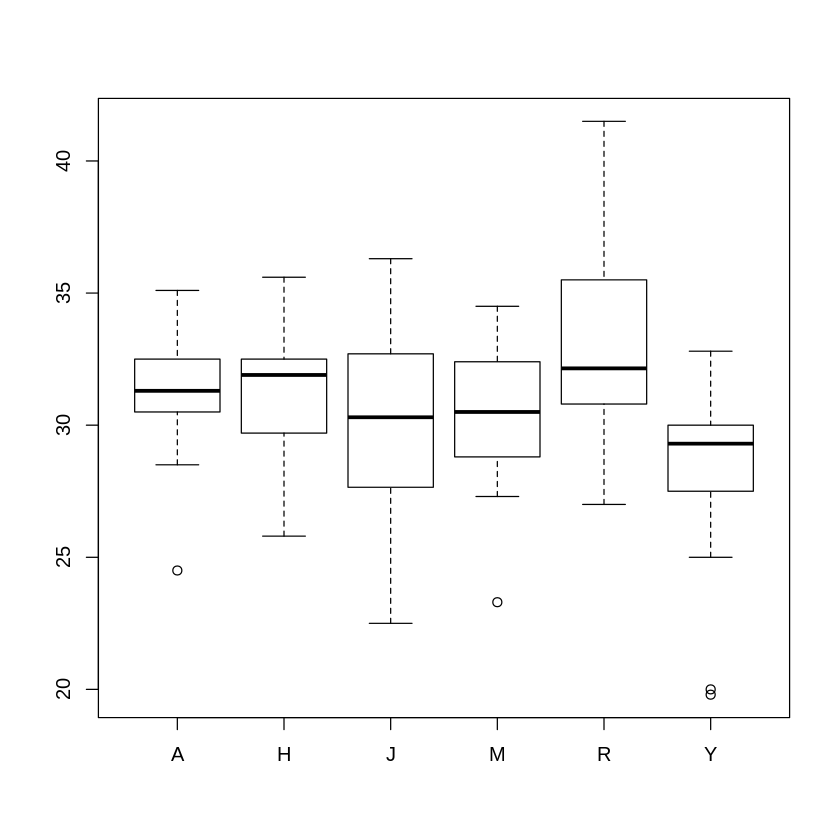

In [169]:
plot(topTenScores$Division, topTenScores$Total.after.SJ)

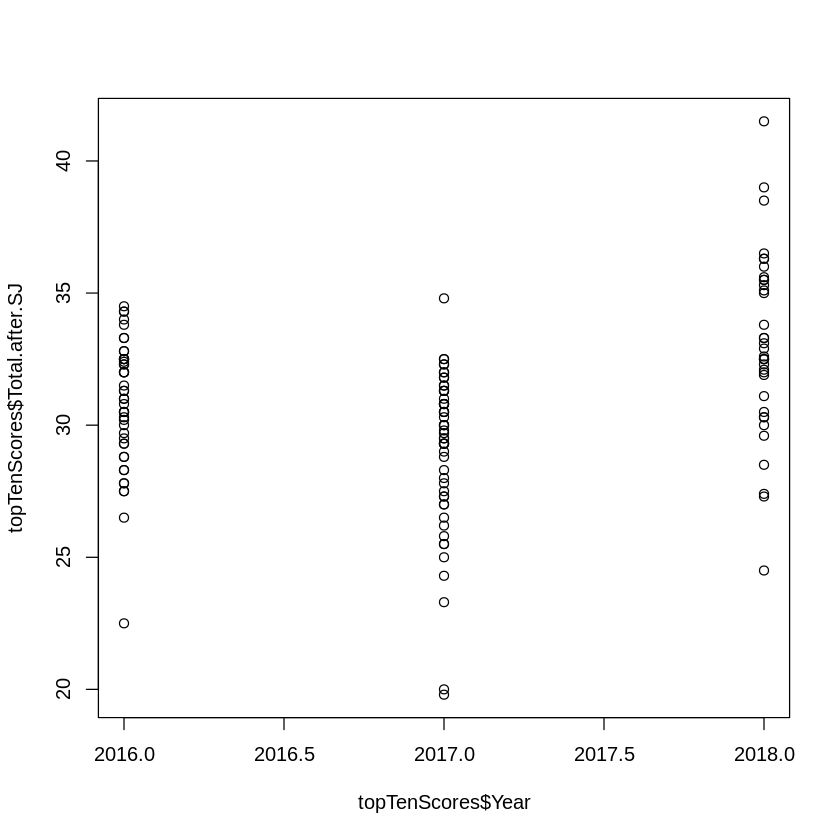

In [170]:
plot(topTenScores$Year, topTenScores$Total.after.SJ)

## Machine Learning

<machine learning part goes here>

## Conclusion

In conclusion...